#### Dataset
The Cardiovascular Disease dataset has been taken from Kaggle.It has a total number of 70,000 records of patients data and 12 columns.

#### Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [3]:
#importing libraries

In [2]:
'''import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
#import tensorflow as tf
#from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta,Adam
#from tensorflow.keras.layers import BatchNormalization,LeakyReLU
#from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import seaborn as sns
import scipy.stats as stats
import sklearn'''
import os

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import log_loss
import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Reading the data

In [3]:
df=pd.read_csv('cardio_train.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Exploratory Data Analysis (EDA)


 Here I have tried to explore the data and find out more about the chosen dataset.

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Visualisation

First I'm checking for any outliers and handling them so that the accuracy can be increased.

In [6]:
x = df.copy(deep=True)
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=standartization(x)
x_std.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,-0.436058,2,0.443449,-0.847867,-0.122181,-0.088238,1,1,0,0,1,0
1,1,0.307684,1,-1.018161,0.749826,0.072610,-0.035180,3,1,0,0,1,1
2,2,-0.247995,1,0.078046,-0.708937,0.007679,-0.141296,3,1,0,0,0,1
3,3,-0.748147,2,0.565250,0.541431,0.137540,0.017878,1,1,0,0,1,1
4,4,-0.808538,1,-1.018161,-1.264657,-0.187111,-0.194354,1,1,0,0,0,0


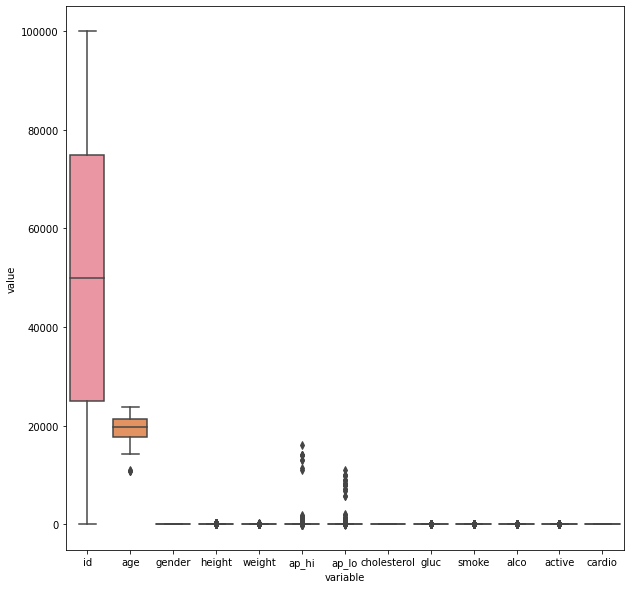

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.boxplot(x="variable",y="value",data=pd.melt(df))

In [9]:
df=df[(df.ap_hi>=90) & (df.ap_hi<=170)]
df=df[(df.ap_lo>=60) & (df.ap_lo<=105)]

In [10]:
df["cardio"].value_counts()


0    34393
1    32792
Name: cardio, dtype: int64

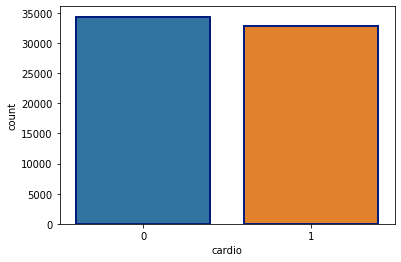

In [11]:
sns.countplot(x='cardio',data=df,linewidth=2,edgecolor=sns.color_palette("dark", 1))

In [12]:
df['age']=(df['age']/365).round()
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58.0,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [13]:
print(df.age[(df.age<=40) & (df.cardio==1)].count())
print(df.age[(df.age<=40) & (df.cardio==0)].count())
print(df.age[((df.age>40)&(df.age<=50)) & (df.cardio==1)].count())
print(df.age[((df.age>40)&(df.age<=50)) & (df.cardio==0)].count())

print(df.age[((df.age>50)&(df.age<=60)) & (df.cardio==1)].count())
print(df.age[((df.age>50)&(df.age<=60)) & (df.cardio==0)].count())

print(df.age[(df.age>=61) & (df.cardio==1)].count())
print(df.age[(df.age>=61) & (df.cardio==0)].count())

667
2366
7682
12517
17668
16361
6775
3149


### Graph Plotting
A line graph and bar graph are plotted to demonstrate the interrelationship between Age & Heart disease and Gender & Heart disease, respectively.

#### Line graph 

The data points are balanced between the sets of people with and without heart disease equally. But it can be seen from the graph that in the age group ranging from 41–60 years, the rate of heart disease remains the highest.

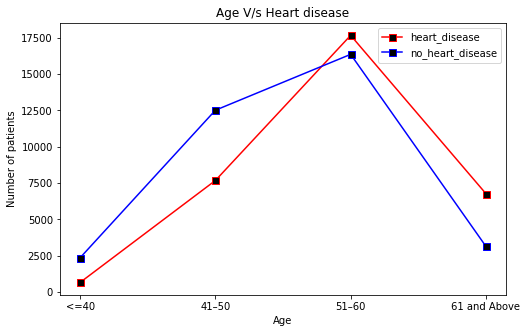

In [14]:
plt.subplots(figsize =(8,5))
classifiers = ['<=40', '41–50', '51–60','61 and Above']
heart_disease = [667, 7682, 17668, 6775]
no_heart_disease = [2366, 12517, 16361, 3149]
l1 = plt.plot(classifiers, heart_disease , color='r', marker='s', linestyle ='solid', markerfacecolor='k', markersize=7)
l2 = plt.plot(classifiers, no_heart_disease, color='b',marker='s', linestyle ='solid', markerfacecolor='k', markersize=7)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Age V/s Heart disease')
plt.legend((l1[0], l2[0]), ('heart_disease', 'no_heart_disease'))
plt.show()

In [15]:
print(df.gender[(df.gender==1)].count())
print(df.gender[(df.gender==1) & (df.cardio==1)].count())
print(df.gender[(df.gender==2)].count())
print(df.gender[(df.gender==2) & (df.cardio==1)].count())

43838
21331
23347
11461


#### Bar Graph
The total number of males and females in the dataset is 23347 and 43838, respectively. It can be seen from the bar graph that out of 23347 males 11461 have a heart disease and out of 43838 females 21331 are suffering from a heart disease.

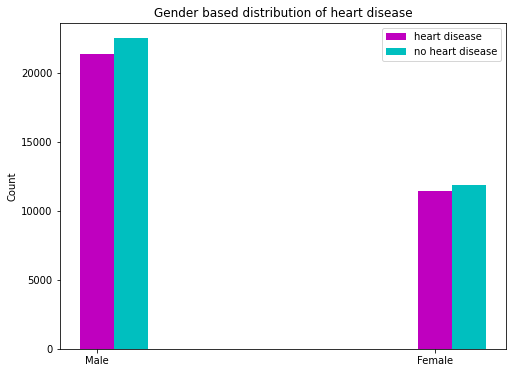

In [16]:
N = 2
ind = np.arange(N)
width = 0.1
fig, ax = plt.subplots(figsize =(8,6))
heart_disease = [21331, 11461]
rects1 = ax.bar(ind, heart_disease, width, color='m')
no_heart_disease = [22507, 11886]
rects2 = ax.bar(ind+width, no_heart_disease, width, color='c')
ax.set_ylabel('Count')
ax.set_title('Gender based distribution of heart disease')
ax.set_xticks(ind)
ax.set_xticklabels(('Male','Female'))
ax.legend((rects1[0], rects2[0]), ('heart disease', 'no heart disease'))
plt.show()

### Feature Selection

 Since irrelevant or partially relevant features can negatively impact the model performance, in order to achieve better accuracy for the model I identified the highly important features from the dataset by implementing a feature selection method - Correlation Matrix with Heatmap.

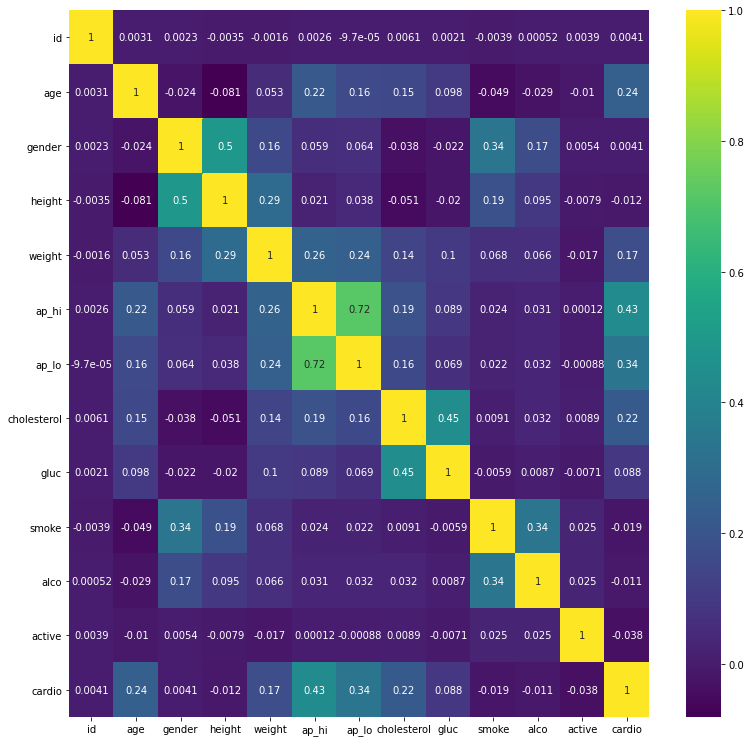

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis")

Age,gender,weight,ap_hi,ap_lo,cholestrol and gluc were the highly correlated features with the cardio variable.So the less important features were removed.

In [18]:
df=df.drop(['height','smoke','alco','active'], axis=1)
cardio=df['cardio']
df = df.drop(['cardio'],axis=1)
df.head()

,id,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc
0,0,50.0,2,62.0,110,80,1,1
1,1,55.0,1,85.0,140,90,3,1
2,2,52.0,1,64.0,130,70,3,1
3,3,48.0,2,82.0,150,100,1,1
4,4,48.0,1,56.0,100,60,1,1


Split the dataset

Here I am splitting the dataset in the ratio 70:30 to create training and testing subsets.

In [20]:
#  split data into training and testing set:
x_train, x_test, y_train, y_test = train_test_split(df, cardio, test_size=0.3, random_state=10)

# Base Learners


In this analysis Multinomial NB, Logistic Regression, Decision Tree and Random Forest are regarded as the base learners. I've used Confusion matrix to describe the performance of these classifiers.

In [21]:
clfs = []
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
np.random.seed(1)

In [43]:
clfs

[MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=3, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=5, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=50, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        m

In [1]:
pipeline_svm = make_pipeline(SVC(probability=True, kernel="linear", class_weight="balanced"))
grid_svm = GridSearchCV(pipeline_svm,
 param_grid = {'svc__C': [0.01, 0.1, 1]},cv = kfolds, verbose=1,n_jobs=-1)
grid_svm.fit(x_train, y_train)
grid_svm.score(x_test, y_test)
print("\nBest Model: %f using %s" % (grid_svm.best_score_, grid_svm.best_params_))
print('\n')
print('SVM LogLoss {score}'.format(score=log_loss(y_test, grid_svm.predict_proba(x_test))))
clfs.append(grid_svm)
# save best model to current working directory
joblib.dump(grid_svm, "heart_disease.pkl")

NameError: name 'make_pipeline' is not defined

 ### Multinomial Naïve Bayes

In [23]:
classifierNB=MultinomialNB()
classifierNB.fit(x_train,y_train)
classifierNB.score(x_test, y_test)
print('MultinomialNB LogLoss {score}'.format(score=log_loss(y_test, classifierNB.predict_proba(x_test))))
clfs.append(classifierNB)
joblib.dump(classifierNB, "heart_disease.pkl")

MultinomialNB LogLoss 5.7465180787051935


['heart_disease.pkl']

In [25]:
model_classifierNB = joblib.load("heart_disease.pkl" )

MultinomialNB accuracy score:  0.521978567176027




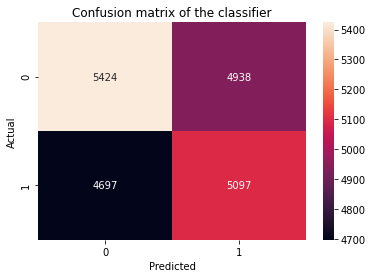



              precision    recall  f1-score   support

           0       0.54      0.52      0.53     10362
           1       0.51      0.52      0.51      9794

    accuracy                           0.52     20156
   macro avg       0.52      0.52      0.52     20156
weighted avg       0.52      0.52      0.52     20156



In [27]:
y_preds = model_classifierNB.predict(x_test)
print('MultinomialNB accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
#import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
cmx_df = pd.DataFrame(cmx)
plt.title('Confusion matrix of the classifier')

heatmap = sns.heatmap(cmx_df, annot=True, annot_kws={"size": 10}, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# print(cmx)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cmx)
# plt.title('Confusion matrix of the classifier')
# fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()
print('\n')
print(classification_report(y_test, y_preds))

### Logistic Regression (LR)

In [28]:
classifierLR=LogisticRegression()
classifierLR.fit(x_train,y_train)
classifierLR.score(x_test, y_test)
print('LogisticRegression LogLoss {score}'.format(score=log_loss(y_test, classifierLR.predict_proba(x_test))))
clfs.append(classifierLR)

LogisticRegression LogLoss 0.6710967130064954


In [29]:
joblib.dump(classifierLR, "heart_disease.pkl")
# load from file and predict using the best configs found in the CV step
model_classifierLR = joblib.load("heart_disease.pkl")

Logistic Regression accuracy score:  0.5727822980750149




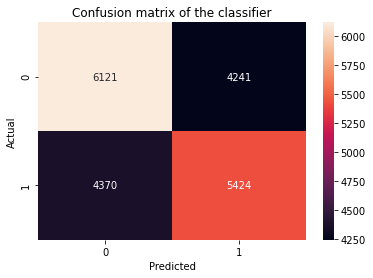



              precision    recall  f1-score   support

           0       0.58      0.59      0.59     10362
           1       0.56      0.55      0.56      9794

    accuracy                           0.57     20156
   macro avg       0.57      0.57      0.57     20156
weighted avg       0.57      0.57      0.57     20156



In [32]:
y_preds = model_classifierLR.predict(x_test)
print('Logistic Regression accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
#import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
cmx_df = pd.DataFrame(cmx)
plt.title('Confusion matrix of the classifier')

heatmap = sns.heatmap(cmx_df, annot=True, annot_kws={"size": 10}, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# print(cmx)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cmx)
# plt.title('Confusion matrix of the classifier')
# fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()
print('\n')
print(classification_report(y_test, y_preds))

### Decision Tree (DT)

Decision Tree LogLoss 0.5602683194599382
Decision Tree accuracy score:  0.7204802540186545




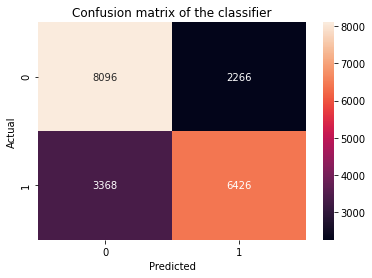



              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10362
           1       0.74      0.66      0.70      9794

    accuracy                           0.72     20156
   macro avg       0.72      0.72      0.72     20156
weighted avg       0.72      0.72      0.72     20156



In [33]:
classifierDT=DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=3, min_samples_leaf=5)
classifierDT.fit(x_train,y_train)
classifierDT.score(x_test, y_test)
print('Decision Tree LogLoss {score}'.format(score=log_loss(y_test, classifierDT.predict_proba(x_test))))
clfs.append(classifierDT)
# save best model to current working directory
joblib.dump(classifierDT, "heart_disease.pkl")
# load from file and predict using the best configs found in the CV step
model_classifierDT = joblib.load("heart_disease.pkl")
# get predictions from best model above
y_preds = model_classifierDT.predict(x_test)
print("Decision Tree accuracy score: ",accuracy_score(y_test, y_preds))
print('\n')
#import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
cmx_df = pd.DataFrame(cmx)
plt.title('Confusion matrix of the classifier')

heatmap = sns.heatmap(cmx_df, annot=True, annot_kws={"size": 10}, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# print(cmx)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cmx)
# plt.title('Confusion matrix of the classifier')
# fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()
print('\n')
print(classification_report(y_test, y_preds))

### Random Forest (RF)

In [ ]:
classifierRF=RandomForestClassifier(random_state=123)
classifierRF.fit(x_train,y_train)
classifierRF.score(x_test, y_test)
print('RandomForest LogLoss {score}'.format(score=log_loss(y_test, classifierRF.predict_proba(x_test))))
clfs.append(classifierRF)
# save best model to current working directory
joblib.dump(classifierRF, "heart_disease.pkl")
# load from file and predict using the best configs found in the CV step
model_classifierRF = joblib.load("heart_disease.pkl" )
# get predictions from best model above
y_preds = model_classifierRF.predict(x_test)
print('Random Forest accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
#import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
#print(cmx)

cmx_df = pd.DataFrame(cmx)
plt.title('Confusion matrix of the classifier')

heatmap = sns.heatmap(cmx_df, annot=True, annot_kws={"size": 10}, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
'''
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
'''
print('\n')
print(classification_report(y_test, y_preds))


## Accuracy of Base Learners

In [35]:
#print(‘Accuracy of svm: {}’.format(grid_svm.score(x_test, y_test)))
#print(‘\n’)
print('Accuracy of naive bayes: {}'.format(classifierNB.score(x_test, y_test)))
print('\n')
print('Accuracy of logistic regression: {}'.format(classifierLR.score(x_test, y_test)))
print('\n')
print('Accuracy of decision tree: {}'.format(classifierDT.score(x_test, y_test)))
print('\n')
print('Accuracy of random forest: {}'.format(classifierRF.score(x_test, y_test)))

Accuracy of naive bayes: 0.521978567176027


Accuracy of logistic regression: 0.5727822980750149


Accuracy of decision tree: 0.7204802540186545


Accuracy of random forest: 0.6964179400674737


# ENSEMBLE LEARNING

### Majority Voting:

majority_voting_accuracy:  0.6881325659853146




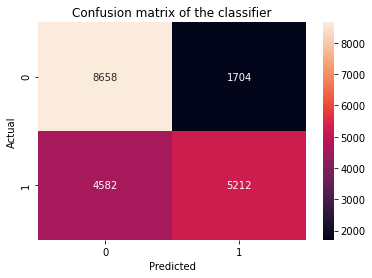



              precision    recall  f1-score   support

           0       0.65      0.84      0.73     10362
           1       0.75      0.53      0.62      9794

    accuracy                           0.69     20156
   macro avg       0.70      0.68      0.68     20156
weighted avg       0.70      0.69      0.68     20156



In [36]:
# Ensemble Majority Voting Classifier
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[ ('nb', classifierNB), ('lr', classifierLR), ('dt', classifierDT),('rf', classifierRF)]
#create our voting classifier, inputting our models
majority_voting = VotingClassifier(estimators, voting='hard')
#fit model to training data
majority_voting.fit(x_train, y_train)
#test our model on the test data
majority_voting.score(x_test, y_test)
# save best model to current working directory
joblib.dump(majority_voting, "heart_disease.pkl")
# load from file and predict using the best configs found in the CV step
model_max_v = joblib.load("heart_disease.pkl" )
# get predictions from best model above
y_preds = model_max_v.predict(x_test)
print('majority_voting_accuracy: ',majority_voting.score(x_test, y_test))
print('\n')
#import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
cmx_df = pd.DataFrame(cmx)
plt.title('Confusion matrix of the classifier')
heatmap = sns.heatmap(cmx_df, annot=True, annot_kws={"size": 10}, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#print(cmx)
'''fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()'''
print('\n')
print(classification_report(y_test, y_preds))


### Weighted Average Voting:

ensemble score: 0.5570862142073967
Best Weights: [8.66320977e-03 5.74627151e-18 7.81907500e-01 2.09429291e-01]
The accuracy weighted average classifier is : 0.7212244492954951
weighted_average_accuracy:  0.7212244492954951




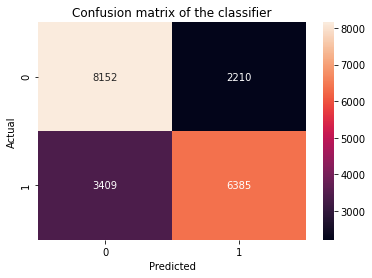

[[8152 2210]
 [3409 6385]]


              precision    recall  f1-score   support

           0       0.71      0.79      0.74     10362
           1       0.74      0.65      0.69      9794

    accuracy                           0.72     20156
   macro avg       0.72      0.72      0.72     20156
weighted avg       0.72      0.72      0.72     20156



In [44]:
#Ensemble Weighted average classifier
#finding the optimum weights
from scipy.optimize import minimize
predictions = []
for clff in clfs:
 predictions.append(clff.predict_proba(x_test))
def log_loss_func(weights):
 final_prediction = 0
 for weight, prediction in zip(weights, predictions):
     final_prediction += weight*prediction
 return log_loss(y_test, final_prediction)
 
#the algorithms need a starting value, right not we chose 0.5 for all weights
#its better to choose many random starting points and run minimize a few times
starting_values = [0.5]*len(predictions)
#adding constraints and a different solver as suggested by user 16universe
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})
#our weights are bound between 0 and 1
bounds = [(0,1)]*len(predictions)
res = minimize(log_loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)
print('ensemble score: {best_score}'.format(best_score=res['fun']))
print('Best Weights: {weights}'.format(weights=res['x']))
weighted_avg = VotingClassifier(estimators, voting='soft',weights=res['x']).fit(x_train, y_train)
print('The accuracy weighted average classifier is :', weighted_avg.score(x_test,y_test))
# save best model to current working directory
joblib.dump(weighted_avg, "heart_disease.pkl")
# load from file and predict using the best configs found in the CV step
model_w_avg = joblib.load("heart_disease.pkl" )
# get predictions from best model above
y_preds = model_w_avg.predict(x_test)
print('weighted_average_accuracy: ',weighted_avg.score(x_test, y_test))
print('\n')
#import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)

cmx_df = pd.DataFrame(cmx)
plt.title('Confusion matrix of the classifier')
heatmap = sns.heatmap(cmx_df, annot=True, annot_kws={"size": 10}, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(cmx)
'''
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
'''
print('\n')
print(classification_report(y_test, y_preds))


#  Ensemble Classifiers

### Bagging

I have applied Bagging (Bootstrap aggregating) which creates several subsets of data from training sample chosen randomly with replacement and used each collection of subset data to train their decision trees. As a result, I got an ensemble of different models.And the average of all the predictions from different trees were used which is more robust than a single decision tree classifier.


In [46]:
# Bagging
classifierBa= BaggingClassifier(max_samples=0.5, max_features=1.0, n_estimators=50)
classifierBa.fit(x_train,y_train)
classifierBa.score(x_test, y_test)

0.7100119071244294

In [47]:
joblib.dump(classifierBa, "heart_disease.pkl")

['heart_disease.pkl']

In [48]:
model_bagging = joblib.load("heart_disease.pkl")

bagging_accuracy score:  0.7100119071244294




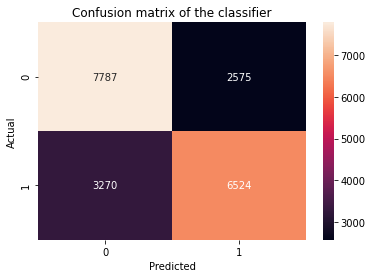



              precision    recall  f1-score   support

           0       0.70      0.75      0.73     10362
           1       0.72      0.67      0.69      9794

    accuracy                           0.71     20156
   macro avg       0.71      0.71      0.71     20156
weighted avg       0.71      0.71      0.71     20156



In [49]:
# get predictions from best model above
y_preds = model_bagging.predict(x_test)
print('bagging_accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
#import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
cmx_df = pd.DataFrame(cmx)
plt.title('Confusion matrix of the classifier')
heatmap = sns.heatmap(cmx_df, annot=True, annot_kws={"size": 10}, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
'''
print(cmx)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()'''
print('\n')
print(classification_report(y_test, y_preds))

### Boosting

#### Adaptive Boosting (AdaBoost):

In [50]:
classifierAdaBoost= AdaBoostClassifier(n_estimators=500)
classifierAdaBoost.fit(x_train,y_train)
classifierAdaBoost.score(x_test, y_test)

0.7229112919230006

In [51]:
# saving best model to current working directory
joblib.dump(classifierAdaBoost, "heart_disease.pkl")
model_Ada_boost = joblib.load("heart_disease.pkl" )

In [2]:
 #get predictions from best model above

Ada_boost_accuracy score:  0.7229112919230006




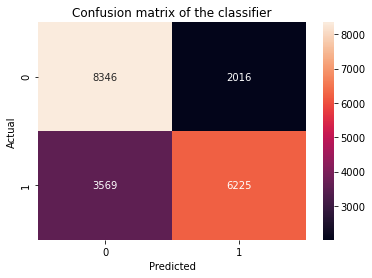



              precision    recall  f1-score   support

           0       0.70      0.81      0.75     10362
           1       0.76      0.64      0.69      9794

    accuracy                           0.72     20156
   macro avg       0.73      0.72      0.72     20156
weighted avg       0.73      0.72      0.72     20156



In [52]:
y_preds = model_Ada_boost.predict(x_test)
print('Ada_boost_accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
#import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
cmx_df = pd.DataFrame(cmx)
plt.title('Confusion matrix of the classifier')

heatmap = sns.heatmap(cmx_df, annot=True, annot_kws={"size": 10}, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#print(cmx)
'''fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title("Confusion matrix of the classifier")
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()'''
print('\n')
print(classification_report(y_test, y_preds))

#### Gradient Boosting:

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
classifierGBo= GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=1)
classifierGBo.fit(x_train,y_train)
classifierGBo.score(x_test, y_test)

0.725788846993451

In [54]:
joblib.dump(classifierGBo, "heart_disease.pkl")
model_Gradient_boosting = joblib.load("heart_disease.pkl")

Gradient_boosting_accuracy score:  0.725788846993451




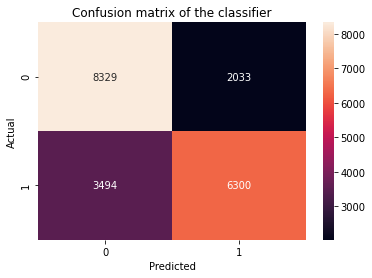



              precision    recall  f1-score   support

           0       0.70      0.80      0.75     10362
           1       0.76      0.64      0.70      9794

    accuracy                           0.73     20156
   macro avg       0.73      0.72      0.72     20156
weighted avg       0.73      0.73      0.72     20156



In [56]:
y_preds = model_Gradient_boosting.predict(x_test)
print('Gradient_boosting_accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
#import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
cmx_df = pd.DataFrame(cmx)
plt.title('Confusion matrix of the classifier')

heatmap = sns.heatmap(cmx_df, annot=True, annot_kws={"size": 10}, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#print(cmx)
'''fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.show()'''
print('\n')
print(classification_report(y_test, y_preds))





## Accuracy of Ensemble combination methods & Ensemble classifiers

In [57]:
print('\n')
print('Majority Voting accuracy score: ',majority_voting.score(x_test, y_test))
print('Weighted Average accuracy score: ',weighted_avg.score(x_test, y_test))
print('Bagging_accuracy score: ',classifierBa.score(x_test, y_test))
print('Ada_boost_accuracy score: ',classifierAdaBoost.score(x_test, y_test))
print('Gradient_boosting_accuracy score: ',classifierGBo.score(x_test, y_test))



Majority Voting accuracy score:  0.6881325659853146
Weighted Average accuracy score:  0.7212244492954951
Bagging_accuracy score:  0.7100119071244294
Ada_boost_accuracy score:  0.7229112919230006
Gradient_boosting_accuracy score:  0.725788846993451
